In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
!pip install japanize-matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipaexfont is already the newest version (00401-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


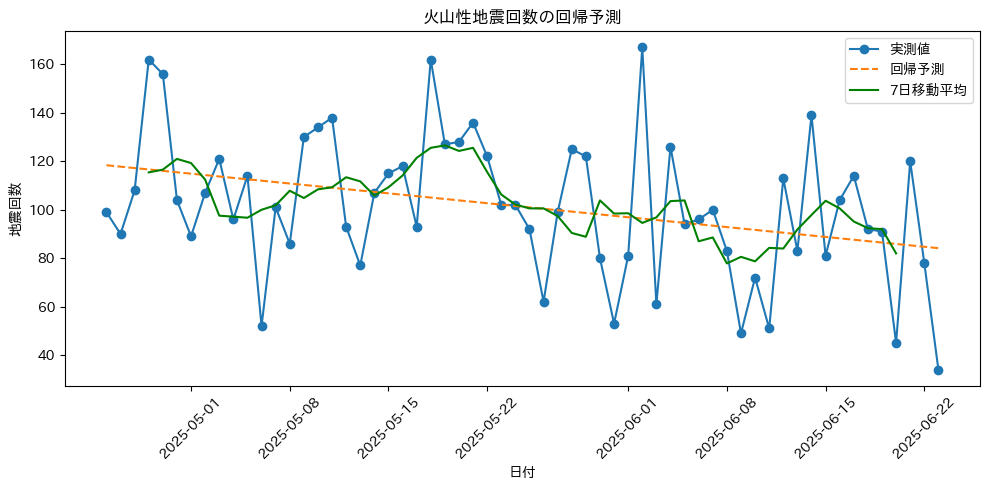

回帰係数（傾き）: -0.5801
切片: 429028.7257


In [5]:
# 1. 日本語フォントをインストール
!apt-get -y install fonts-ipaexfont

# 2. フォント設定
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

# 3.　コード
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

dates = pd.date_range(start='2025-04-25', periods=60, freq='D')
counts = [99, 90, 108, 162, 156, 104, 89, 107, 121, 96, 114, 52, 101, 86, 130, 134, 138, 93, 77, 107,
          115, 118, 93, 162, 127, 128, 136, 122, 102, 102, 92, 62, 99, 125, 122, 80, 53, 81, 167, 61,
          126, 94, 96, 100, 83, 49, 72, 51, 113, 83, 139, 81, 104, 114, 92, 91, 45, 120, 78, 34]

df = pd.DataFrame({'date': dates, 'count': counts})
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

X = df[['date_ordinal']]
y = df['count']
model = LinearRegression()
model.fit(X, y)

df['predicted'] = model.predict(X)
df['rolling'] = df['count'].rolling(window=7, center=True).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['count'], label='実測値', marker='o')
plt.plot(df['date'], df['predicted'], label='回帰予測', linestyle='--')
plt.plot(df['date'], df['rolling'], label='7日移動平均', color='green')
plt.title('火山性地震回数の回帰予測')
plt.xlabel('日付')
plt.ylabel('地震回数')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'回帰係数（傾き）: {model.coef_[0]:.4f}')
print(f'切片: {model.intercept_:.4f}')

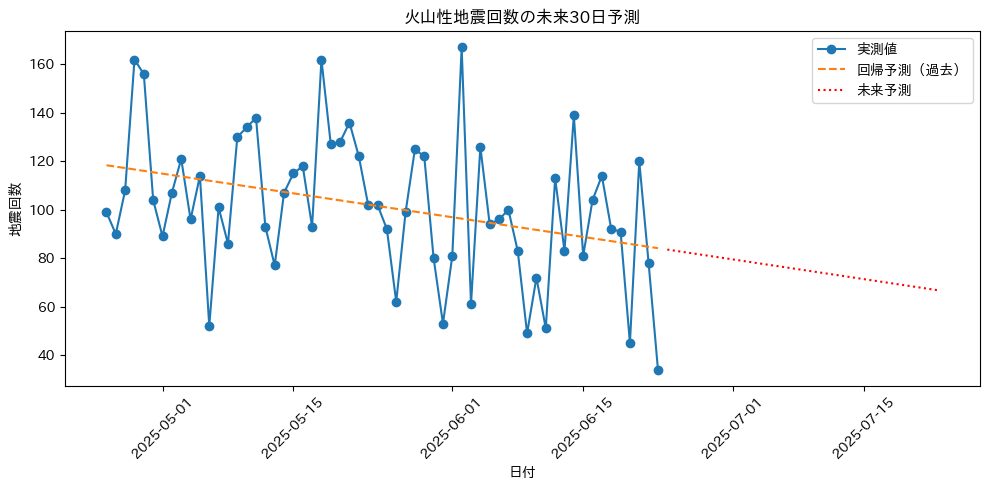

In [7]:
future_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_date_ordinal = future_dates.map(pd.Timestamp.toordinal).to_frame(name='date_ordinal')

# 未来予測
future_pred = model.predict(future_date_ordinal)

# 未来データフレーム作成
df_future = pd.DataFrame({'date': future_dates, 'predicted': future_pred})

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['count'], label='実測値', marker='o')
plt.plot(df['date'], df['predicted'], label='回帰予測（過去）', linestyle='--')
plt.plot(df_future['date'], df_future['predicted'], label='未来予測', linestyle=':', color='red')
plt.title('火山性地震回数の未来30日予測')
plt.xlabel('日付')
plt.ylabel('地震回数')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipaexfont is already the newest version (00401-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


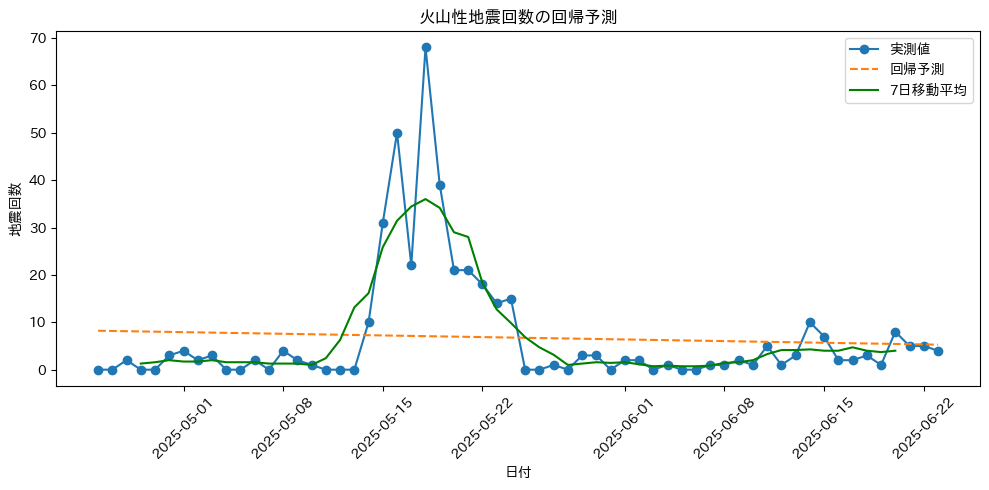

回帰係数（傾き）: -0.0498
切片: 36842.9859


In [8]:
# 1. 日本語フォントをインストール
!apt-get -y install fonts-ipaexfont

# 2. フォント設定
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

# 3. コード
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

dates = pd.date_range(start='2025-04-25', periods=60, freq='D')
counts = [0,	0,	2,	0,	0,	3,	4,	2,	3,	0,	0,	2,	0,	4,	2,	1,	0,	0,	0,	10, 31,	50,	22,	68,	39,	21,	21,	18,	14,	15,	0,	0,	1,	0,	3,	3,	0,	2,	2,	0, 1,	0,	0,	1,	1,	2,	1,	5,	1,	3,	10,	7,	2,	2,	3,	1,	8,	5,	5,	4]

df = pd.DataFrame({'date': dates, 'count': counts})
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

X = df[['date_ordinal']]
y = df['count']
model = LinearRegression()
model.fit(X, y)

df['predicted'] = model.predict(X)
df['rolling'] = df['count'].rolling(window=7, center=True).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['count'], label='実測値', marker='o')
plt.plot(df['date'], df['predicted'], label='回帰予測', linestyle='--')
plt.plot(df['date'], df['rolling'], label='7日移動平均', color='green')
plt.title('火山性地震回数の回帰予測')
plt.xlabel('日付')
plt.ylabel('地震回数')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'回帰係数（傾き）: {model.coef_[0]:.4f}')
print(f'切片: {model.intercept_:.4f}')

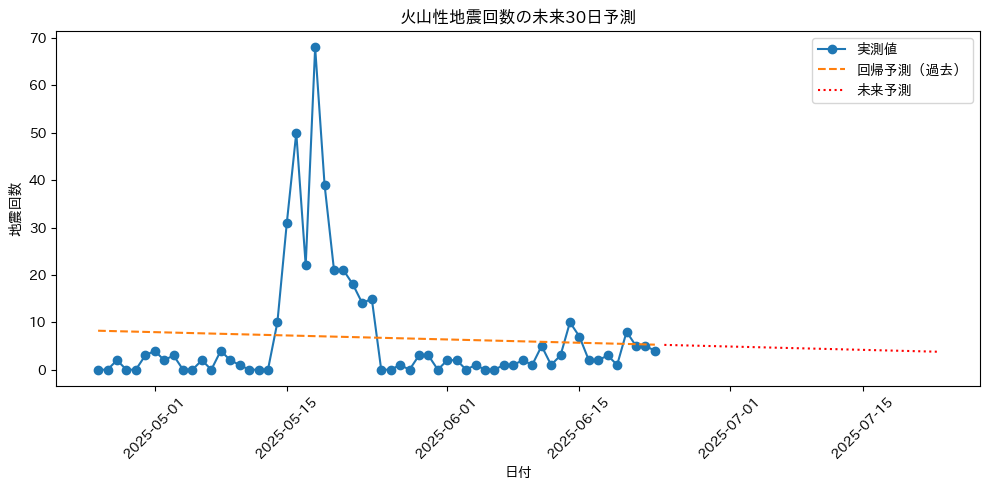

In [9]:
future_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_date_ordinal = future_dates.map(pd.Timestamp.toordinal).to_frame(name='date_ordinal')

# 未来予測
future_pred = model.predict(future_date_ordinal)

# 未来データフレーム作成
df_future = pd.DataFrame({'date': future_dates, 'predicted': future_pred})

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['count'], label='実測値', marker='o')
plt.plot(df['date'], df['predicted'], label='回帰予測（過去）', linestyle='--')
plt.plot(df_future['date'], df_future['predicted'], label='未来予測', linestyle=':', color='red')
plt.title('火山性地震回数の未来30日予測')
plt.xlabel('日付')
plt.ylabel('地震回数')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
